In [2]:
from utils import build_name, get_df

names = []
a = []

for dataset in ["CUB", "AwA"]:
    for model in ["backbone", "CBM", "CEM"]:
        for mode in ["Std", "LPGD", "CPGD"]:
            if (mode == "CPGD") and model == "backbone":
                continue
            name = build_name(
                {
                    "dataset": dataset,
                    "model": model,
                    "train_mode": mode,
                }
            )
            names.append(name)
cols = ["name"]
for mode in ["Std", "LPGD", "AA", "CPGD", "JPGD"]:
    cols.append(f"{mode} Concept Acc")
    if mode != "Std":
        cols.append(f"{mode} Concept ASR")
df = get_df(names, cols)
for col in df.columns:
    df[col] = df[col].fillna("-")
    df[col] = df[col].apply(lambda x: f"{x * 100:.2f}" if isinstance(x, float) else x)

print(df.to_latex(index=False))

cols = ["name"]
for mode in ["Std", "LPGD", "AA", "CPGD", "JPGD"]:
    cols.append(f"{mode} Acc")
    if mode != "Std":
        cols.append(f"{mode} ASR")
df = get_df(names, cols)
for col in df.columns:
    df[col] = df[col].fillna("-")
    df[col] = df[col].apply(lambda x: f"{x * 100:.2f}" if isinstance(x, float) else x)

print(df.to_latex(index=False))

\begin{tabular}{llllllllll}
\toprule
name & Std Concept Acc & LPGD Concept Acc & LPGD Concept ASR & AA Concept Acc & AA Concept ASR & CPGD Concept Acc & CPGD Concept ASR & JPGD Concept Acc & JPGD Concept ASR \\
\midrule
cub_backbone_std & - & - & - & - & - & - & - & - & - \\
cub_backbone_lpgd & - & - & - & - & - & - & - & - & - \\
cub_cbm_std & 94.41 & 79.40 & 15.90 & 81.23 & 13.97 & 76.98 & 18.46 & 79.01 & 16.32 \\
cub_cbm_lpgd & 91.33 & 88.67 & 2.92 & 89.83 & 1.65 & 87.37 & 4.34 & 88.05 & 3.60 \\
cub_cbm_cpgd & 91.22 & 88.78 & 2.68 & 89.77 & 1.59 & 87.17 & 4.44 & 88.01 & 3.52 \\
cub_cem_std & 96.10 & 76.98 & 19.90 & 79.48 & 17.30 & 74.09 & 22.91 & 76.64 & 20.25 \\
cub_cem_lpgd & 95.36 & 91.16 & 4.41 & 92.83 & 2.65 & 90.20 & 5.41 & 90.84 & 4.74 \\
cub_cem_cpgd & 95.37 & 91.43 & 4.13 & 93.04 & 2.45 & 90.48 & 5.13 & 91.10 & 4.48 \\
awa_backbone_std & - & - & - & - & - & - & - & - & - \\
awa_backbone_lpgd & - & - & - & - & - & - & - & - & - \\
awa_cbm_std & 96.39 & 70.07 & 27.30 & 70.61 

/tmp/ipykernel_3752058/565654430.py:150: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


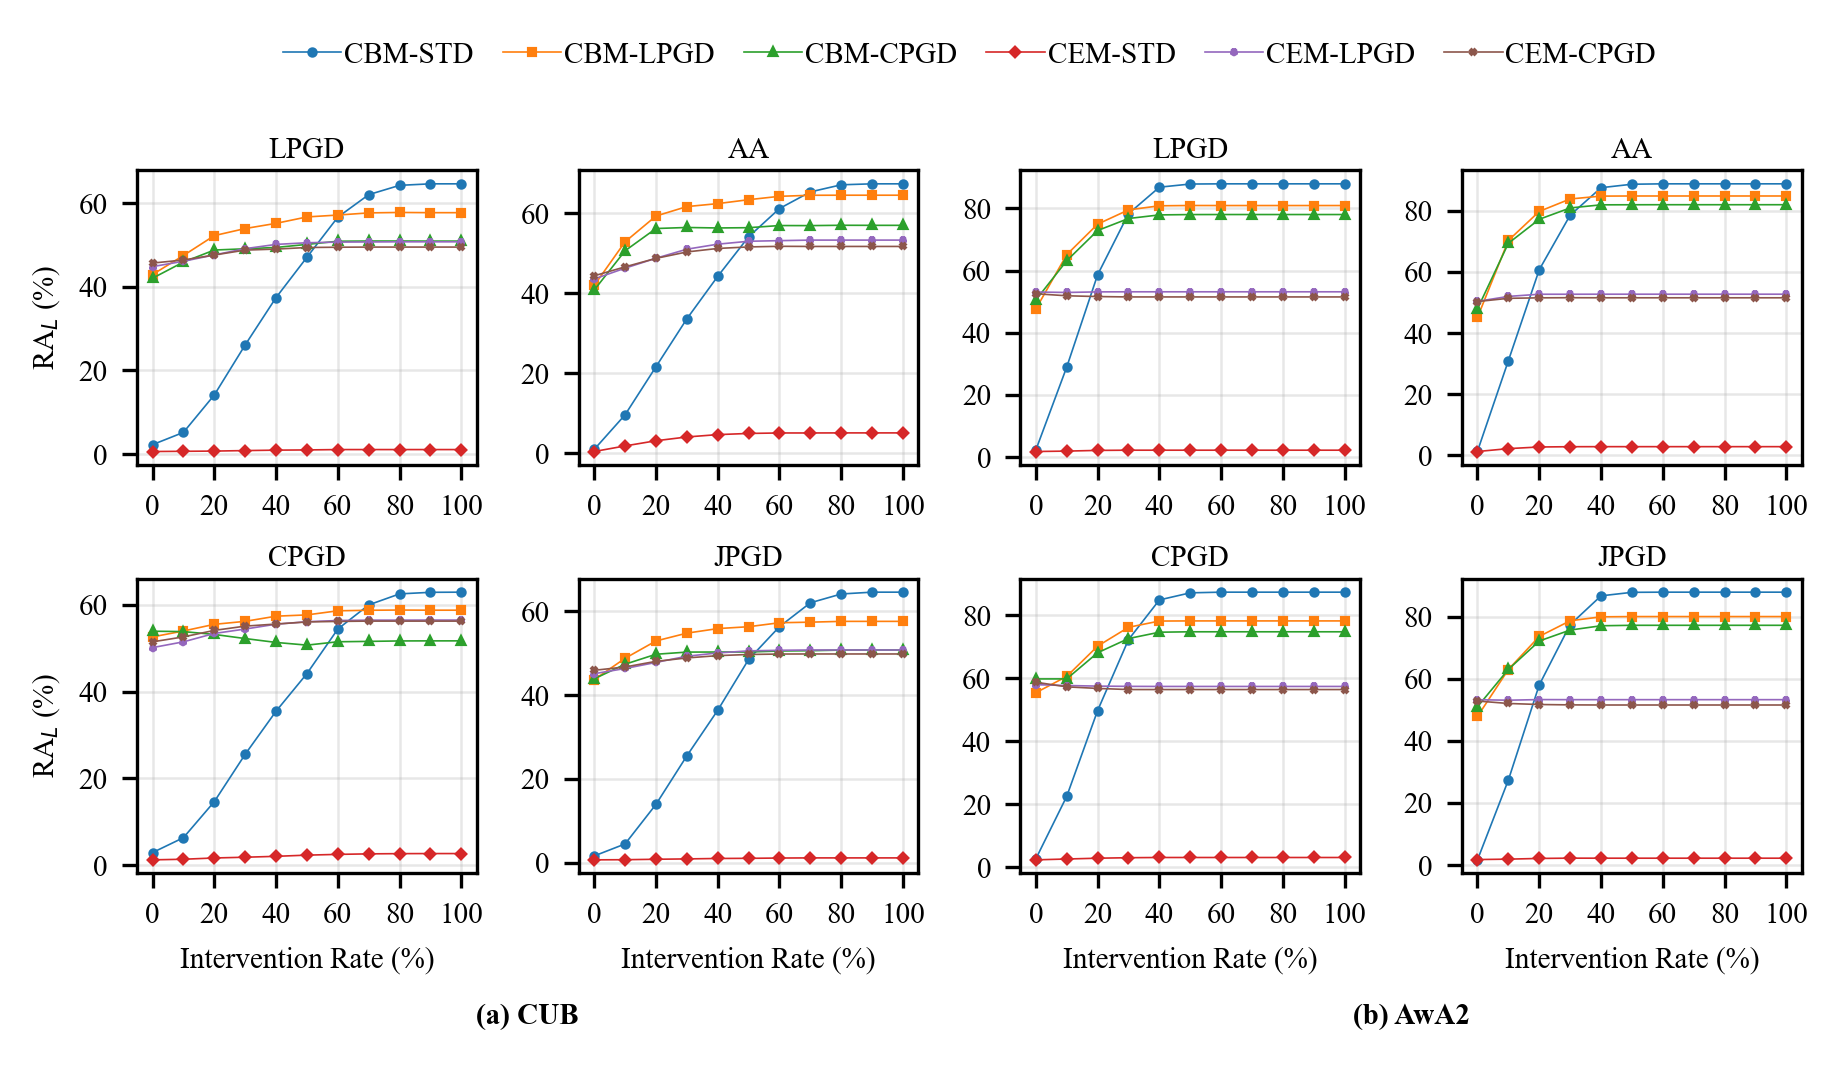

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from utils import build_name, get_df

plt.rcParams.update(
    {
        "font.family": "Times New Roman",  # Standard font for academic papers
        "font.size": 10,  # Base font size
        "axes.labelsize": 10,  # Label font size
        "xtick.labelsize": 7,  # X-tick labels
        "ytick.labelsize": 7,  # Y-tick labels
        "legend.fontsize": 7,  # Legend font size
        "figure.figsize": (7.16, 7.16),  # Full page width
        "figure.dpi": 300,  # High resolution for publication
        "lines.linewidth": 1,  # Line width
        "lines.markersize": 4,  # Marker size
        "axes.linewidth": 0.8,  # Frame width
        "grid.linewidth": 0.6,  # Grid line width
        "axes.grid": True,  # Enable grid by default
        "axes.grid.which": "major",  # Use major grid lines
        "grid.alpha": 0.3,  # Grid transparency
    }
)

colors = plt.cm.tab10(np.linspace(0, 1, 10))
markers = ["o", "s", "^", "D", "*", "x", "+", "v", "<", ">"]

# Create the main figure
w = 7.16
fig = plt.figure(figsize=(w, w * 0.6))

# Create GridSpec for complex layout
gs = gridspec.GridSpec(4, 4, height_ratios=[0.01, 1, 1, 0.2], 
                       width_ratios=[1, 1, 1, 1],
                       hspace=0.7, wspace=0.3)

# Prepare data for both datasets
datasets = ["CUB", "AwA"]
attack_modes = ["LPGD", "AA", "CPGD", "JPGD"]
all_handles = []
all_labels = []

# Process data for each dataset
dataset_data = {}
for dataset in datasets:
    names = []
    for model in ["CBM", "CEM"]:
        for mode in ["Std", "LPGD", "CPGD"]:
            name = build_name(
                {
                    "dataset": dataset,
                    "model": model,
                    "train_mode": mode,
                }
            )
            names.append(name)
    
    cols = ["name"]
    for mode in attack_modes:
        cols.append(f"{mode} Acc with Intervene")
    
    # names.append(dataset.lower() + "_vcbm_res_dim-16_jpgd")
    df = get_df(names, cols)
    for col in df.columns:
        df[col] = df[col].fillna(0.0)
    df['name'] = df['name'].str.replace(r'^cub_|^awa_', '', regex=True)
    df['name'] = df['name'].str.replace(r'vcbm_res_dim-16_jpgd', 'RAIDCXM', regex=True)
    df['name'] = df['name'].str.upper()
    # df['name'] = df['name'].str.replace(r'STD', 'ST', regex=True)
    # df['name'] = df['name'].str.replace(r'LPGD', 'SAT', regex=True)
    # df['name'] = df['name'].str.replace(r'CPGD', 'RCL', regex=True)
    df['name'] = df['name'].str.replace(r'_', '-', regex=True)
    
    dataset_data[dataset] = df

# Create subplots for data visualization
subplot_labels = {
    "CUB": ["i", "ii", "iii", "iv"],
    "AwA": ["i", "ii", "iii", "iv"]
}

# Plot data in 2x2 grids for each dataset
for dataset_idx, dataset in enumerate(datasets):
    df = dataset_data[dataset]
    
    for attack_idx, attack in enumerate(attack_modes):
        # Calculate position in the grid
        row = 1 + (attack_idx // 2)
        col = (dataset_idx * 2) + (attack_idx % 2)
        
        ax = fig.add_subplot(gs[row, col])
        
        plot_data = df[["name", f"{attack} Acc with Intervene"]]
        
        for idx, row_data in plot_data.iterrows():
            if row_data[f"{attack} Acc with Intervene"] == 0.0:
                continue
            
            line = ax.plot(
                range(0, 101, 10),
                [y*100 for y in row_data[f"{attack} Acc with Intervene"]],
                label=row_data["name"],
                color=colors[idx],
                marker=markers[idx],
                markersize=1.5,
                linewidth=0.4,
                linestyle="-",
            )
            
            # Collect handles and labels for legend (only once)
            if dataset_idx == 0 and attack_idx == 0:
                all_handles.append(line[0])
                all_labels.append(row_data["name"])
        if row == 2:
            ax.set_xlabel("Intervention Rate (%)", fontsize=7)
        if col == 0:
            ax.set_ylabel("RA$_L$ (%)", fontsize=7)
        ax.set_xticks(range(0, 101, 20))
        
        # Add subplot label and title
        subplot_label = subplot_labels[dataset][attack_idx]
        if dataset == "CUB":
            label_num = f"a.{subplot_label}"
        else:
            label_num = f"b.{subplot_label}"
        
        ax.set_title(f"{attack}", fontsize=7, pad=3)

# Create legend in the first row
legend_ax = fig.add_subplot(gs[0, :])
legend_ax.axis('off')
legend_ax.legend(all_handles, all_labels, 
                 loc='center', ncol=7,
                 frameon=False, fancybox=False,
                 columnspacing=1.0, handletextpad=0.1)

# Add dataset labels in the bottom row
label_ax_cub = fig.add_subplot(gs[3, 0:2])
label_ax_cub.axis('off')
label_ax_cub.text(0.5, 0.5, '(a) CUB', ha='center', va='center', 
                  fontsize=7, fontweight='bold')

label_ax_awa = fig.add_subplot(gs[3, 2:4])
label_ax_awa.axis('off')
label_ax_awa.text(0.5, 0.5, '(b) AwA2', ha='center', va='center', 
                  fontsize=7, fontweight='bold')

# Adjust layout and save
plt.tight_layout()
plt.savefig("intervene.pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()
plt.close()


In [3]:
names = [
    "cub_cbm_std",
    "backbone_plus-112_cub_backbone_std",
    "custom_num-200_customcub_ignore_intervenes-true_cbm_std",
    "backbone_plus-true_cub_backbone_std",
    "cub_cbm_lpgd",
    "backbone_plus-true_cub_backbone_lpgd",
    "custom_num-200_customcub_cbm_lpgd",
    "backbone_plus-true_cub_backbone_lpgd",
]
col = [
    "Std Acc",
    "LPGD Acc",
    "LPGD ASR",
    "AA Acc",
    "AA ASR",
]

from utils import get_df
df = get_df(names, col)
cols_to_scale = [c for c in col if c in df.columns]
df[cols_to_scale] = df[cols_to_scale].astype(float).mul(100)
print(df.to_latex(index=False, float_format ="%.2f"))

\begin{tabular}{rrrrr}
\toprule
Std Acc & LPGD Acc & LPGD ASR & AA Acc & AA ASR \\
\midrule
75.53 & 2.23 & 97.05 & 0.90 & 98.81 \\
79.98 & 0.62 & 99.22 & 0.16 & 99.81 \\
77.82 & 0.85 & 98.91 & 0.26 & 99.67 \\
79.00 & 0.85 & 98.93 & 0.41 & 99.48 \\
73.11 & 42.94 & 41.27 & 41.94 & 42.63 \\
74.13 & 45.93 & 38.04 & 41.82 & 43.59 \\
76.44 & 42.58 & 44.30 & 40.63 & 46.85 \\
74.13 & 45.93 & 38.04 & 41.82 & 43.59 \\
\bottomrule
\end{tabular}



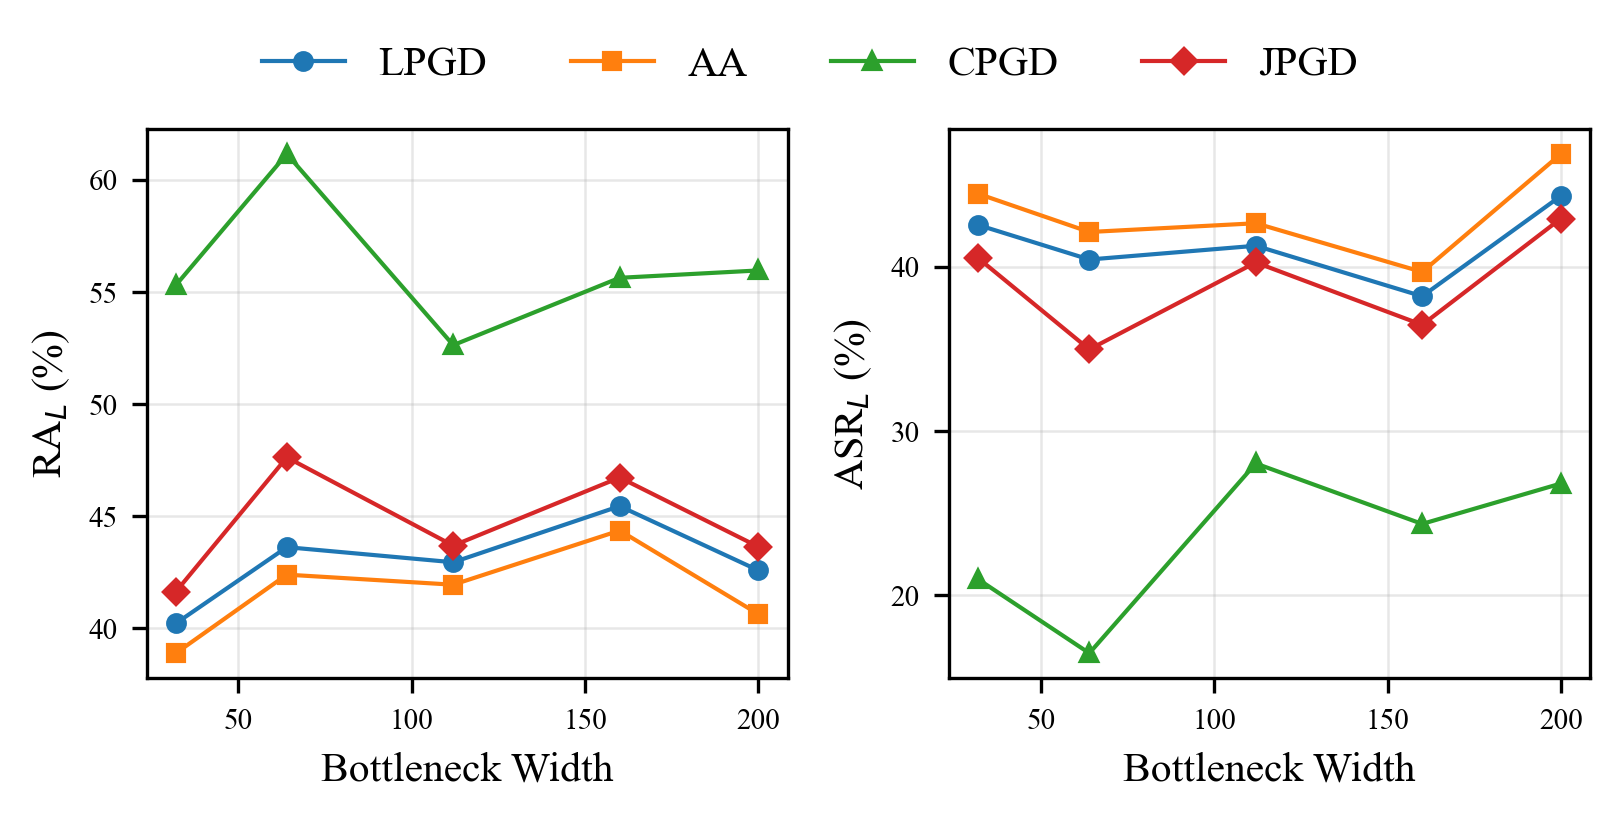

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from utils import get_df

names = [
    "custom_num-32_customcub_ignore_intervenes-true_cbm_lpgd",
    "custom_num-64_customcub_ignore_intervenes-true_cbm_lpgd",
    "cub_cbm_lpgd",
    "custom_num-160_customcub_ignore_intervenes-true_cbm_lpgd",
    "custom_num-200_customcub_cbm_lpgd",
]
cols = ["name"]
for mode in ["LPGD", "AA", "CPGD", "JPGD"]:
    cols.append(f"{mode} Acc")
    cols.append(f"{mode} ASR")

df = get_df(names, cols)

# 创建图形和布局
fig = plt.figure(figsize=(5.5, 2.5), dpi=300)

# 创建独立子图
ax1 = fig.add_subplot(121)  # RAL 图
ax2 = fig.add_subplot(122)  # ASR 图

# 设置全局样式
plt.rcParams.update(
    {
        "font.family": "Times New Roman",
        "font.size": 10,
        "axes.labelsize": 12,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
        "axes.linewidth": 0.8,
        "grid.linewidth": 0.6,
        "axes.grid": True,
        "grid.alpha": 0.3,
    }
)

# 颜色和标记设置
colors = plt.cm.tab10(np.linspace(0, 1, 10))
markers = ["o", "s", "^", "D"]
x_values = [32, 64, 112, 160, 200]
attack_modes = ["LPGD", "AA", "CPGD", "JPGD"]

# 存储所有线条用于图例
all_lines = []

# 绘制RAL图
for idx, mode in enumerate(attack_modes):
    (line,) = ax1.plot(
        x_values,
        [y * 100 for y in df[f"{mode} Acc"]],
        color=colors[idx],
        marker=markers[idx],
        markersize=4,
        linewidth=1,
        label=f"{mode}",
    )
    all_lines.append(line)
    ax1.set_xlabel("Bottleneck Width")
    ax1.set_ylabel("RA$_L$ (%)")

# 绘制ASR图
for idx, mode in enumerate(attack_modes):
    (line,) = ax2.plot(
        x_values,
        [y * 100 for y in df[f"{mode} ASR"]],
        color=colors[idx],
        marker=markers[idx],
        markersize=4,
        linewidth=1,
        # linestyle='--',
        label=f"{mode}",
    )
    # all_lines.append(line)
    ax2.set_xlabel("Bottleneck Width")
    ax2.set_ylabel("ASR$_L$ (%)")

# 创建统一图例
fig.legend(
    handles=all_lines,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),  # 将图例定位在顶部中心，超出图形区域
    ncol=4,
    frameon=False,
    fancybox=False,
    shadow=False,
    fontsize=10,
)

# 调整子图间距和位置
plt.subplots_adjust(
    top=0.85,  # 为顶部图例留出空间
    bottom=0.15,  # 底部间距
    wspace=0.3,  # 子图间水平间距
    left=0.1,  # 左侧间距
    right=0.95,  # 右侧间距
)
# 调整布局
plt.tight_layout()
# plt.subplots_adjust(top=0.92)  # 为顶部图例留出空间
plt.savefig("bottleneck.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

In [ ]:
a = []
for res in [16, 32, 64, 128, 8]:
    for vib in [0.01, 0.1, 1, 0.001]:
        a.append(
            build_name(
                {
                    "dataset": "CUB",
                    "model": "VCBM",
                    "train_mode": "JPGD",
                    "res_dim": res,
                    "vib": vib,
                }
            )
        )

df = get_df(a, ["name", "AA Acc", "Std Acc"])

results_matrix_aa = np.zeros((5, 4))
results_matrix_std = np.zeros((5, 4))
for i, res in enumerate([8, 16, 32, 64, 128]):
    for j, vib in enumerate([0.001, 0.01, 0.1, 1]):
        name = build_name(
            {
                "dataset": "CUB",
                "model": "VCBM",
                "train_mode": "JPGD",
                "res_dim": res,
                "vib": vib,
            }
        )
        results_matrix_aa[i, j] = df[df["name"] == name]["AA Acc"].mean()
        results_matrix_std[i, j] = df[df["name"] == name]["Std Acc"].mean()

import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

plt.rcParams.update(
    {
        "font.family": "Times New Roman",  # Standard font for academic papers
        "font.size": 12,  # Base font size
        "axes.labelsize": 17,  # Label font size
        "xtick.labelsize": 12,  # X-tick labels
        "ytick.labelsize": 12,  # Y-tick labels
        "legend.fontsize": 12,  # Legend font size
        "figure.figsize": (3.4368, 2.2912),  # Figure size in inches (ACM column width)
        "figure.dpi": 300,  # High resolution for publication
        "lines.linewidth": 1,  # Line width
        "lines.markersize": 4,  # Marker size
        "axes.linewidth": 0.8,  # Frame width
        "grid.linewidth": 0.6,  # Grid line width
        "axes.grid": True,  # Enable grid by default
        "axes.grid.which": "major",  # Use major grid lines
        "grid.alpha": 0.3,  # Grid transparency
    }
)

res_list = [8, 16, 32, 64, 128]
vib_list = [0.001, 0.01, 0.1, 1]

fig, axes = plt.subplots(1, 2, figsize=(6.5, 3.2))

# 第一个子图：AA Acc 热力图
ax1 = axes[0]
sns.heatmap(
    results_matrix_aa,
    ax=ax1,
    yticklabels=res_list,
    xticklabels=vib_list,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    # cbar_kws={"label": "RA$_L$ (%)"}
)
ax1.set_xlabel("Info Loss Weight", fontsize=14)
ax1.set_ylabel("Number of Virtual Concept", fontsize=14)
ax1.set_title("RA$_L$ (%)", fontsize=14)

# 第二个子图：Std Acc 热力图
ax2 = axes[1]
sns.heatmap(
    results_matrix_std,
    ax=ax2,
    yticklabels=res_list,
    xticklabels=vib_list,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    # cbar_kws={"label": "CA$_L$ (%)"},
)
ax2.set_xlabel("Info Loss Weight", fontsize=14)
# ax2.set_ylabel("Number of Virtual Concept", fontsize=12)
ax2.set_title("CA$_L$ (%)", fontsize=14)

cbar1 = ax1.collections[0].colorbar
cbar2 = ax2.collections[0].colorbar
cbar1.ax.tick_params(labelsize=12)
cbar2.ax.tick_params(labelsize=12)
# cbar1.ax.set_ylabel("RA$_L$ (%)", fontsize=12)
# cbar2.ax.set_ylabel("CA$_L$ (%)", fontsize=12)
plt.tight_layout()
plt.savefig("hyper.pdf")
plt.show()


In [ ]:
from collections import defaultdict
from utils import build_name, get_df

names = []

for dataset in ["CUB", "AwA"]:
    for model in ["CBM", "CEM"]:
        for mode in ["Std", "LPGD", "CPGD"]:
            if (mode == "CPGD") and model == "backbone":
                continue
            name = build_name(
                {
                    "dataset": dataset,
                    "model": model,
                    "train_mode": mode,
                }
            )
            names.append(name)
cols = ["name"]
for mode in ["Std", "LPGD", "AA", "CPGD", "JPGD"]:
    cols.append(f"{mode} Acc with Intervene")

print(names)
print(cols)
df = get_df(names, cols)

for mode in ["Std", "LPGD", "AA", "CPGD", "JPGD"]:
    df[f"{mode} IGR"] = df.apply(
        lambda row: (
            row[f"{mode} Acc with Intervene"][-1] - row[f"{mode} Acc with Intervene"][0]
        )
        / (1 - row[f"{mode} Acc with Intervene"][0]),
        axis=1,
    )
print(df[["name"] + [f"{atk} IGR" for atk in ["Std", "LPGD", "AA", "CPGD", "JPGD"]]].to_latex(index=False, float_format="%.2f"))

for dataset in ["CUB", "AwA"]:
    d = defaultdict(int)
    for atk in ["Std", "LPGD", "AA", "CPGD", "JPGD"]:
        s = "& " + atk
        for mode in ["Std", "LPGD", "CPGD"]:
            if (mode == "CPGD") and model == "backbone":
                continue
            name = build_name(
                {
                    "dataset": dataset,
                    "model": "CBM",
                    "train_mode": mode,
                }
            )
            igr = df.loc[df["name"] == name,  f"{atk} IGR"].item()
            s += f" & {igr:.2f}"
            d[mode] += igr
        print(f"{s}\\\\")
    s = "& \\textit{Average}"
    for mode in ["Std", "LPGD", "CPGD"]:
        s += f" & {d[mode] / 5:.2f}"
    print(f"{s}\\\\")

['cub_cbm_std', 'cub_cbm_lpgd', 'cub_cbm_cpgd', 'cub_cem_std', 'cub_cem_lpgd', 'cub_cem_cpgd', 'awa_cbm_std', 'awa_cbm_lpgd', 'awa_cbm_cpgd', 'awa_cem_std', 'awa_cem_lpgd', 'awa_cem_cpgd']
['name', 'Std Acc with Intervene', 'LPGD Acc with Intervene', 'AA Acc with Intervene', 'CPGD Acc with Intervene', 'JPGD Acc with Intervene']
\begin{tabular}{lrrrrr}
\toprule
name & Std IGR & LPGD IGR & AA IGR & CPGD IGR & JPGD IGR \\
\midrule
cub_cbm_std & 0.55 & 0.64 & 0.67 & 0.62 & 0.64 \\
cub_cbm_lpgd & 0.03 & 0.26 & 0.39 & 0.13 & 0.25 \\
cub_cbm_cpgd & -0.19 & 0.15 & 0.27 & -0.05 & 0.12 \\
cub_cem_std & 0.18 & 0.00 & 0.05 & 0.01 & 0.00 \\
cub_cem_lpgd & 0.15 & 0.11 & 0.17 & 0.13 & 0.10 \\
cub_cem_cpgd & 0.11 & 0.07 & 0.13 & 0.10 & 0.07 \\
awa_cbm_std & 0.37 & 0.88 & 0.89 & 0.87 & 0.88 \\
awa_cbm_lpgd & 0.21 & 0.64 & 0.72 & 0.51 & 0.62 \\
awa_cbm_cpgd & 0.01 & 0.56 & 0.65 & 0.37 & 0.54 \\
awa_cem_std & 0.11 & 0.00 & 0.02 & 0.01 & 0.00 \\
awa_cem_lpgd & 0.01 & 0.00 & 0.05 & -0.01 & 0.00 \\
awa_cem_

In [24]:
from utils import build_name, get_df
import numpy as np

names = []

for dataset in ["CUB"]:
    for model in ["backbone", "CBM", "CEM"]:
        for mode in ["Std", "LPGD", "CPGD"]:
            if (mode == "CPGD") and model == "backbone":
                continue
            name = build_name(
                {
                    "dataset": dataset,
                    "model": model,
                    "train_mode": mode,
                }
            )
            names.append(name)
    names.append(dataset.lower() + "_hsic_weight-0.0001_vcbm_res_dim-32_jpgd")
    names.append(dataset.lower() + "_hsic_weight-0.0001_vcbm_res_dim-32_lpgd")
    names.append(dataset.lower() + "_hsic_weight-0.0001_cbm_res_dim-32_jpgd")
    names.append(dataset.lower() + "_vcbm_jpgd")
for dataset in ["AwA"]:
    for model in ["backbone", "CBM", "CEM"]:
        for mode in ["Std", "LPGD", "CPGD"]:
            if (mode == "CPGD") and model == "backbone":
                continue
            name = build_name(
                {
                    "dataset": dataset,
                    "model": model,
                    "train_mode": mode,
                }
            )
            names.append(name)
    names.append(dataset.lower() + "_hsic_weight-0.0001_vcbm_res_dim-32_jpgd-copy")
    names.append(dataset.lower() + "_hsic_weight-0.0001_vcbm_res_dim-32_lpgd-copy")
    names.append(dataset.lower() + "_hsic_weight-0.0001_cbm_res_dim-32_jpgd-copy")
    names.append(dataset.lower() + "_vcbm_jpgd-copy")
cols = ["name"]
for mode in ["Std", "LPGD", "AA", "JPGD", "CPGD"]:
    cols.append(mode + " Acc")
    cols.append(mode + " Acc with Intervene")

df = get_df(names, cols)
modes = ["LPGD", "AA", "JPGD", "CPGD"]
indices = [3, 5, 7, 10]

for mode in ["Std", "LPGD", "AA", "JPGD", "CPGD"]:
    for i in indices:
        df[f"{mode} Acc with Intervene {i*10}%"] = df.apply(
            lambda row: row[f"{mode} Acc with Intervene"][i] 
            if isinstance(row[f"{mode} Acc with Intervene"], (list, np.ndarray)) 
            and len(row[f"{mode} Acc with Intervene"]) > i
            else np.nan,
            axis=1
        )
df.fillna("-", inplace=True)

for mode in ["LPGD"]:
    cols = ["name", "Std Acc", f"{mode} Acc"]
    for i in indices:
        cols.append(f"Std Acc with Intervene {i*10}%")
        cols.append(f"{mode} Acc with Intervene {i*10}%")
    t = df[cols].copy()

    for col in t.columns:
        t[col] = t[col].fillna("-")
        t[col] = t[col].apply(lambda x: f"{x * 100:.2f}" if isinstance(x, float) else x)
    print(t.to_latex(index=False))

\begin{tabular}{lllllllllll}
\toprule
name & Std Acc & LPGD Acc & Std Acc with Intervene 30% & LPGD Acc with Intervene 30% & Std Acc with Intervene 50% & LPGD Acc with Intervene 50% & Std Acc with Intervene 70% & LPGD Acc with Intervene 70% & Std Acc with Intervene 100% & LPGD Acc with Intervene 100% \\
\midrule
cub_backbone_std & 79.58 & 0.91 & - & - & - & - & - & - & - & - \\
cub_backbone_lpgd & 75.42 & 48.00 & - & - & - & - & - & - & - & - \\
cub_cbm_std & 75.53 & 2.23 & 86.14 & 26.10 & 88.47 & 47.08 & 88.83 & 62.06 & 88.89 & 64.65 \\
cub_cbm_lpgd & 73.11 & 42.94 & 74.11 & 53.95 & 73.56 & 56.73 & 73.80 & 57.70 & 73.80 & 57.75 \\
cub_cbm_cpgd & 72.78 & 42.06 & 68.95 & 49.10 & 67.40 & 50.16 & 67.57 & 50.97 & 67.60 & 50.95 \\
cub_cem_std & 75.91 & 0.59 & 79.43 & 0.81 & 80.12 & 0.97 & 80.24 & 1.05 & 80.24 & 1.05 \\
cub_cem_lpgd & 72.99 & 44.84 & 75.99 & 49.14 & 76.89 & 50.55 & 76.96 & 50.74 & 76.98 & 50.78 \\
cub_cem_cpgd & 73.49 & 45.69 & 75.92 & 48.79 & 76.35 & 49.41 & 76.37 & 49.52 &

/tmp/ipykernel_3755305/49130627.py:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("-", inplace=True)


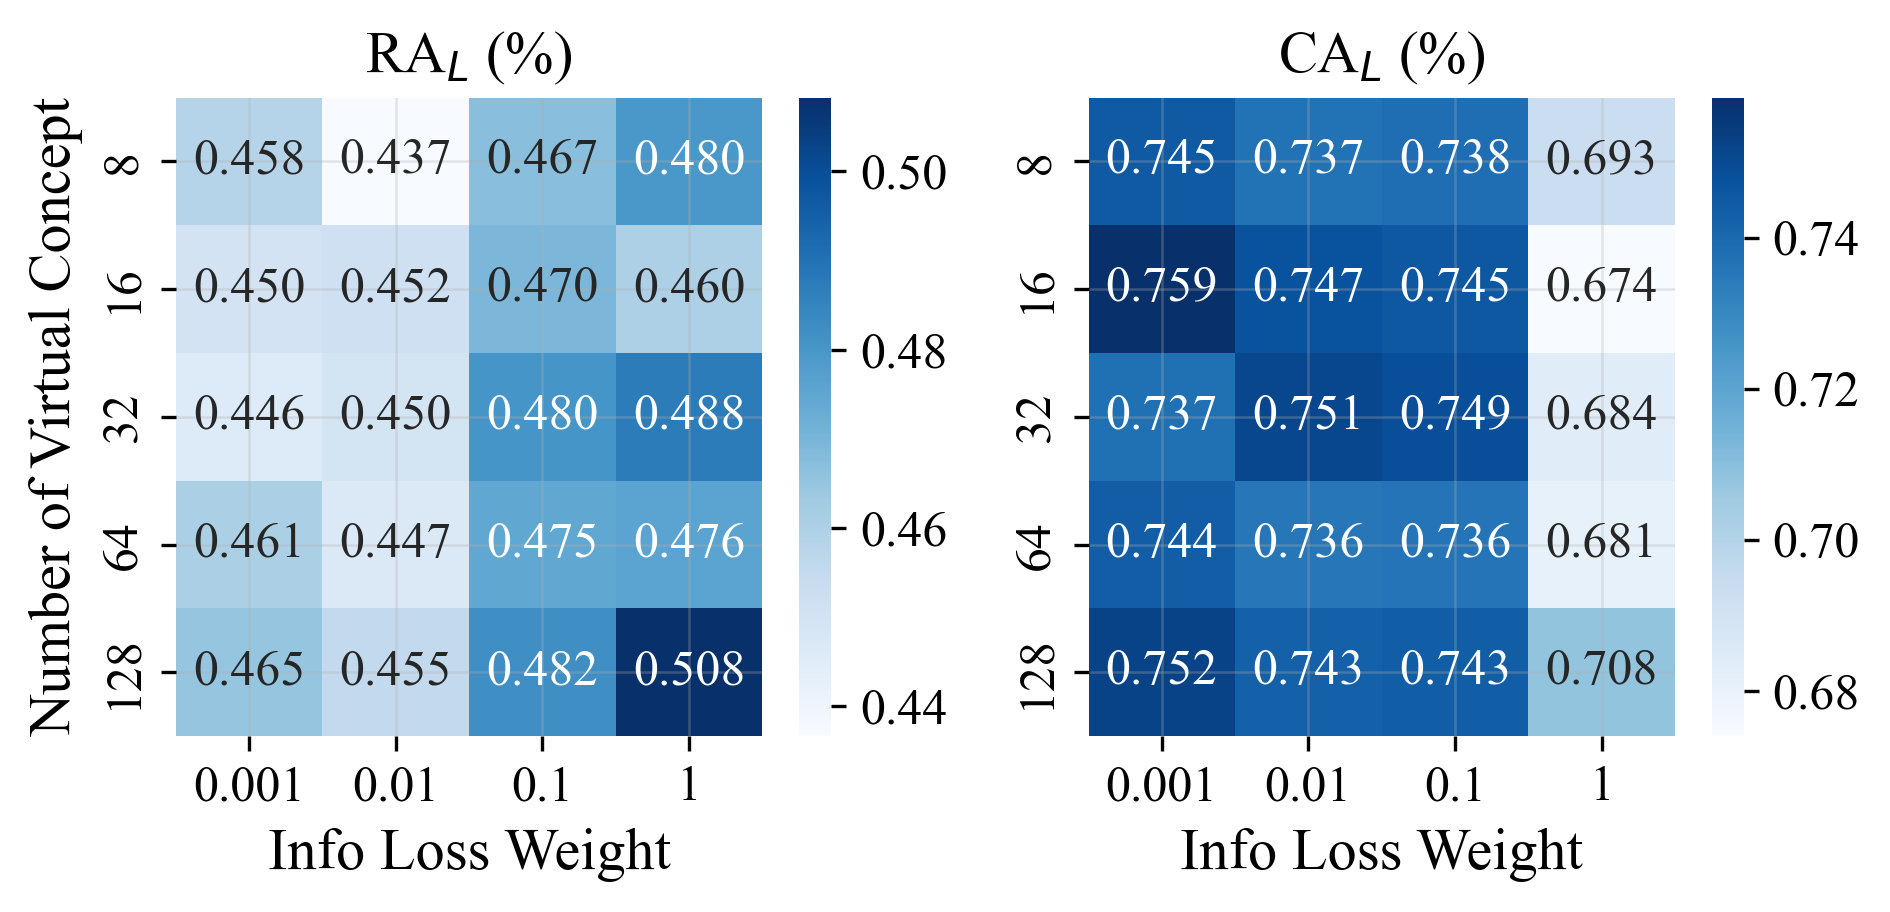

In [5]:
from utils import build_name, get_df
a = []
for res in [16, 32, 64, 128, 8]:
    for vib in [0.01, 0.1, 1, 0.001]:
        a.append(
            build_name(
                {
                    "dataset": "CUB",
                    "model": "VCBM",
                    "train_mode": "JPGD",
                    "res_dim": res,
                    "vib": vib,
                }
            )
        )

df = get_df(a, ["name", "AA Acc", "Std Acc"])

results_matrix_aa = np.zeros((5, 4))
results_matrix_std = np.zeros((5, 4))
for i, res in enumerate([8, 16, 32, 64, 128]):
    for j, vib in enumerate([0.001, 0.01, 0.1, 1]):
        name = build_name(
            {
                "dataset": "CUB",
                "model": "VCBM",
                "train_mode": "JPGD",
                "res_dim": res,
                "vib": vib,
            }
        )
        results_matrix_aa[i, j] = df[df["name"] == name]["AA Acc"].mean()
        results_matrix_std[i, j] = df[df["name"] == name]["Std Acc"].mean()

import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

plt.rcParams.update(
    {
        "font.family": "Times New Roman",  # Standard font for academic papers
        "font.size": 12,  # Base font size
        "axes.labelsize": 17,  # Label font size
        "xtick.labelsize": 12,  # X-tick labels
        "ytick.labelsize": 12,  # Y-tick labels
        "legend.fontsize": 12,  # Legend font size
        "figure.figsize": (3.4368, 2.2912),  # Figure size in inches (ACM column width)
        "figure.dpi": 300,  # High resolution for publication
        "lines.linewidth": 1,  # Line width
        "lines.markersize": 4,  # Marker size
        "axes.linewidth": 0.8,  # Frame width
        "grid.linewidth": 0.6,  # Grid line width
        "axes.grid": True,  # Enable grid by default
        "axes.grid.which": "major",  # Use major grid lines
        "grid.alpha": 0.3,  # Grid transparency
    }
)

res_list = [8, 16, 32, 64, 128]
vib_list = [0.001, 0.01, 0.1, 1]

fig, axes = plt.subplots(1, 2, figsize=(6.5, 3.2))

# 第一个子图：AA Acc 热力图
ax1 = axes[0]
sns.heatmap(
    results_matrix_aa,
    ax=ax1,
    yticklabels=res_list,
    xticklabels=vib_list,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    # cbar_kws={"label": "RA$_L$ (%)"}
)
ax1.set_xlabel("Info Loss Weight", fontsize=14)
ax1.set_ylabel("Number of Virtual Concept", fontsize=14)
ax1.set_title("RA$_L$ (%)", fontsize=14)

# 第二个子图：Std Acc 热力图
ax2 = axes[1]
sns.heatmap(
    results_matrix_std,
    ax=ax2,
    yticklabels=res_list,
    xticklabels=vib_list,
    annot=True,
    fmt=".3f",
    cmap="Blues",
    # cbar_kws={"label": "CA$_L$ (%)"},
)
ax2.set_xlabel("Info Loss Weight", fontsize=14)
# ax2.set_ylabel("Number of Virtual Concept", fontsize=12)
ax2.set_title("CA$_L$ (%)", fontsize=14)

cbar1 = ax1.collections[0].colorbar
cbar2 = ax2.collections[0].colorbar
cbar1.ax.tick_params(labelsize=12)
cbar2.ax.tick_params(labelsize=12)
# cbar1.ax.set_ylabel("RA$_L$ (%)", fontsize=12)
# cbar2.ax.set_ylabel("CA$_L$ (%)", fontsize=12)
plt.tight_layout()
plt.savefig("hyper.pdf")
plt.show()


In [1]:
import os
import tempfile
from lightning.pytorch import seed_everything
import torch
import yaml
import model as pl_model
import dataset
from dotenv import load_dotenv
load_dotenv('../.zshrc')
from main import build

model, dm, cfg = build({"ckpt": "cub_cbm_std"})
adv_model, dm, cfg = build({"ckpt": "cub_cbm_lpgd"})


model.eval()
adv_model.eval()
model.cuda()
adv_model.cuda()
dm.setup("fit")
dl = dm.test_dataloader()

python-dotenv could not parse statement starting at line 6
python-dotenv could not parse statement starting at line 7
python-dotenv could not parse statement starting at line 92
python-dotenv could not parse statement starting at line 124
python-dotenv could not parse statement starting at line 125
python-dotenv could not parse statement starting at line 127
python-dotenv could not parse statement starting at line 128
python-dotenv could not parse statement starting at line 133
/home/jc/anaconda3/envs/cbm/lib/python3.12/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.5.1.post0, which is newer than your current Lightning version: v2.5.0.post0


In [2]:
import numpy as np

std_clean_concepts = []
std_adv_concepts = []
at_clean_concepts = []
at_adv_concepts = []
gt = []

for batch in dl:
    img, _y, _c = batch
    c = model(img.cuda())[1]
    c = torch.sigmoid(c).ge(0.5).bool()
    std_clean_concepts.append(c.detach().cpu().numpy())
    img = model.generate_adv(img.cuda(), _y.cuda(), _c.cuda(), "LPGD")
    c = model(img.cuda())[1]
    c = torch.sigmoid(c).ge(0.5).bool()
    std_adv_concepts.append(c.detach().cpu().numpy())

    c = adv_model(img.cuda())[1]
    c = torch.sigmoid(c).ge(0.5).bool()
    at_clean_concepts.append(c.detach().cpu().numpy())
    img = adv_model.generate_adv(img.cuda(), _y.cuda(), _c.cuda(), "LPGD")
    c = adv_model(img.cuda())[1]
    c = torch.sigmoid(c).ge(0.5).bool()
    at_adv_concepts.append(c.detach().cpu().numpy())

    gt.append(_c.detach().cpu().numpy())

std_clean_concepts = np.concatenate(std_clean_concepts, axis=0)
std_adv_concepts = np.concatenate(std_adv_concepts, axis=0)
at_clean_concepts = np.concatenate(at_clean_concepts, axis=0)
at_adv_concepts = np.concatenate(at_adv_concepts, axis=0)
gt = np.concatenate(gt, axis=0)

In [7]:
l = []
for i in range(dm.num_concepts):
    v = 0
    k = 0
    for j in range(std_clean_concepts.shape[0]):
        if gt[j, i] == at_clean_concepts[j, i]:
            k += 1
        if gt[j, i] != at_adv_concepts[j, i]:
            v += 1
    v /= std_clean_concepts.shape[0]
    l.append([i, v])
l = sorted(l, key=lambda x: x[1], reverse=True)
for i, v in l[:10]:
    print(dm.concept_names[i], v)

In [4]:
epsilon = 1e-5
at_probs = torch.tensor(at_clean_concepts).float() * (1 - epsilon) + epsilon/2
std_probs = torch.tensor(std_clean_concepts).float() * (1 - epsilon) + epsilon/2
kl_per_concept = (at_probs * (torch.log(at_probs) - torch.log(std_probs)) + 
                (1 - at_probs) * (torch.log(1 - at_probs) - torch.log(1 - std_probs)))
total_kl = kl_per_concept.sum(dim=0)
top_kl_values, top_kl_indices = torch.topk(total_kl, k=10)
for idx, i in enumerate(top_kl_indices):
    print(dm.concept_names[i], top_kl_values[idx])

has_eye_color::black tensor(20162.5078)
has_bill_color::black tensor(17514.6094)
has_back_pattern::solid tensor(16989.4980)
has_tail_pattern::solid tensor(16037.5859)
has_breast_pattern::solid tensor(15586.2734)
has_wing_shape::rounded-wings tensor(15195.6172)
has_belly_pattern::solid tensor(14817.1191)
has_wing_color::black tensor(14475.4414)
has_bill_length::shorter_than_head tensor(14304.6816)
has_upperparts_color::black tensor(13767.3789)


In [8]:
from sklearn.metrics import mutual_info_score

num_concepts = dm.num_concepts
std_clean_mi_mat = np.zeros((num_concepts, num_concepts))
std_adv_mi_mat = np.zeros((num_concepts, num_concepts))
at_clean_mi_mat = np.zeros((num_concepts, num_concepts))
at_adv_mi_mat = np.zeros((num_concepts, num_concepts))
gt_mi_mat = np.zeros((num_concepts, num_concepts))

for i in range(num_concepts):
    for j in range(i + 1, num_concepts):
        mi = mutual_info_score(std_clean_concepts[:, i], std_clean_concepts[:, j])
        std_clean_mi_mat[i, j] = mi
        std_clean_mi_mat[j, i] = mi
        mi = mutual_info_score(std_adv_concepts[:, i], std_adv_concepts[:, j])
        std_adv_mi_mat[i, j] = mi
        std_adv_mi_mat[j, i] = mi
        mi = mutual_info_score(at_clean_concepts[:, i], at_clean_concepts[:, j])
        at_clean_mi_mat[i, j] = mi
        at_clean_mi_mat[j, i] = mi
        mi = mutual_info_score(at_adv_concepts[:, i], at_adv_concepts[:, j])
        at_adv_mi_mat[i, j] = mi
        at_adv_mi_mat[j, i] = mi
        mi = mutual_info_score(gt[:, i], gt[:, j])
        gt_mi_mat[i, j] = mi
        gt_mi_mat[j, i] = mi

In [9]:
print("std_clean_mi_mat", std_clean_mi_mat.mean())
print("std_adv_mi_mat", std_adv_mi_mat.mean())
print("at_clean_mi_mat", at_clean_mi_mat.mean())
print("at_adv_mi_mat", at_adv_mi_mat.mean())
print("gt_mi_mat", gt_mi_mat.mean())

std_clean_mi_mat 0.01687313655132444
std_adv_mi_mat 0.009955878854457548
at_clean_mi_mat 0.013654585158313231
at_adv_mi_mat 0.014738997422863548
gt_mi_mat 0.017992784435651884


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

save_dir = "mi_heatmaps"
os.makedirs(save_dir, exist_ok=True)

colors = ["black", "white", "red", "blue", "yellow", "green"]

# 为每种颜色单独创建和保存热力图
for color in colors:
    # 获取包含当前颜色的概念
    color_indices = []
    color_concepts = []
    
    for idx, concept_name in enumerate(dm.concept_names):
        if color.lower() in concept_name.lower():
            color_indices.append(idx)
            color_concepts.append(concept_name)
    
    if len(color_indices) == 0:
        continue
    
    # 提取子矩阵
    indices_array = np.array(color_indices)
    std_sub_matrix = std_clean_mi_mat[indices_array][:, indices_array]
    adv_sub_matrix = at_clean_mi_mat[indices_array][:, indices_array]
    
    # 计算统一的颜色范围
    vmin = min(std_sub_matrix.min(), adv_sub_matrix.min())
    vmax = max(std_sub_matrix.max(), adv_sub_matrix.max())
    
    # 创建标准模型热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(std_sub_matrix, 
                annot=True if len(color_indices) <= 15 else False,
                fmt='.3f',
                cmap='YlOrRd',
                xticklabels=color_concepts,
                yticklabels=color_concepts,
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mutual Information'})
    plt.title(f'Standard Model - {color.capitalize()} Concepts', fontsize=16)
    plt.xlabel('Concept', fontsize=14)
    plt.ylabel('Concept', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/std_{color}_mi_heatmap.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 创建对抗模型热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(adv_sub_matrix, 
                annot=True if len(color_indices) <= 15 else False,
                fmt='.3f',
                cmap='YlOrRd',
                xticklabels=color_concepts,
                yticklabels=color_concepts,
                vmin=vmin,
                vmax=vmax,
                cbar_kws={'label': 'Mutual Information'})
    plt.title(f'Adversarial Model - {color.capitalize()} Concepts', fontsize=16)
    plt.xlabel('Concept', fontsize=14)
    plt.ylabel('Concept', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{save_dir}/adv_{color}_mi_heatmap.png", dpi=300, bbox_inches='tight')
    plt.close()

print(f"\nHeatmaps saved to {save_dir}/")


In [10]:
def frobenius_norm_diff(mi1, mi2):
    mi = mi1 - mi2
    norm = np.linalg.norm(mi, ord='fro')
    return norm
def entropy(mi_matrix, eps=1e-12):
    # Flatten and normalize to a probability distribution
    prob_dist = mi_matrix.flatten()
    prob_dist = prob_dist / (prob_dist.sum() + eps)  # Avoid division by zero
    # Compute entropy (use natural log for consistency with MI units if needed)
    entropy_val = -np.sum(prob_dist * np.log2(prob_dist + eps))  # Add eps to avoid log(0)
    return entropy_val
def normalized_discrepancy_score(mi_dataset, mi_model, eps=1e-12):
    # Compute Frobenius norm difference
    fro_diff = frobenius_norm_diff(mi_dataset, mi_model)
    # Compute entropy of dataset MI matrix
    h_dataset = entropy(mi_dataset, eps)
    # Avoid division by zero (if entropy is 0, return raw Frobenius norm)
    if h_dataset < eps:
        return fro_diff
    else:
        return fro_diff / h_dataset
print("std: ", normalized_discrepancy_score(std_clean_mi_mat, gt_mi_mat))
print("at: ", normalized_discrepancy_score(at_clean_mi_mat, gt_mi_mat))

std:  0.07404743042711301
at:  0.13696227896338567


In [11]:
mi_mat = at_clean_mi_mat - std_clean_mi_mat
flat_mi = []
for i in range(len(mi_mat)):
    for j in range(i+1, len(mi_mat)):  # Only consider upper triangle to avoid duplicates
        if i != j:  # Avoid self-pairs
            flat_mi.append((i, j, mi_mat[i][j]))

# Sort by mutual information value in descending order
sorted_mi = sorted(flat_mi, key=lambda x: abs(x[2]), reverse=True)

# Get the top 10 concept pairs
top_10_pairs = sorted_mi[:10]

print("Top 10 concept pairs by mutual information:")
for i, j, mi_value in top_10_pairs:
    print(f"Concepts {i}-{j} {dm.concept_names[i]} and {dm.concept_names[j]}: MI = {mi_value:.4f}")


Top 10 concept pairs by mutual information:
Concepts 51-52 has_bill_length::about_the_same_as_head and has_bill_length::shorter_than_head: MI = -0.1601
Concepts 7-13 has_wing_color::black and has_upperparts_color::black: MI = -0.1230
Concepts 52-82 has_bill_length::shorter_than_head and has_shape::perching-like: MI = -0.1189
Concepts 20-74 has_underparts_color::white and has_belly_color::white: MI = -0.1161
Concepts 57-106 has_forehead_color::black and has_crown_color::black: MI = -0.0972
Concepts 20-43 has_underparts_color::white and has_breast_color::white: MI = -0.0930
Concepts 48-74 has_throat_color::white and has_belly_color::white: MI = -0.0788
Concepts 4-10 has_wing_color::brown and has_upperparts_color::brown: MI = -0.0774
Concepts 34-61 has_upper_tail_color::black and has_under_tail_color::black: MI = -0.0765
Concepts 33-60 has_upper_tail_color::grey and has_under_tail_color::grey: MI = -0.0746


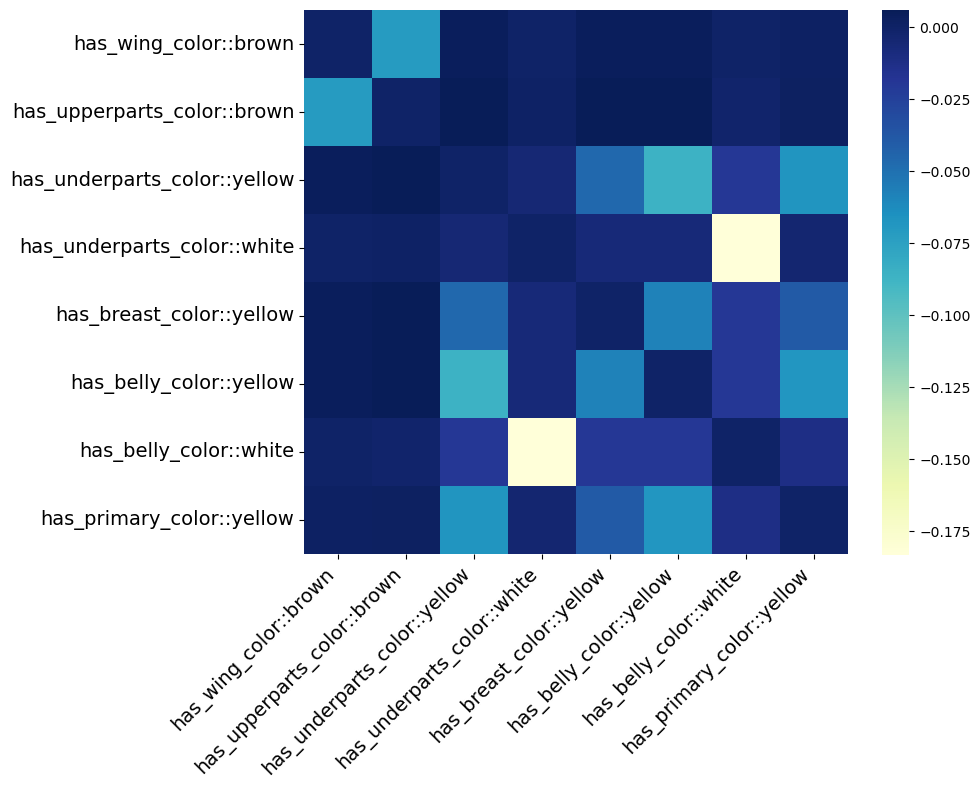

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

mi_mat = std_clean_mi_mat
flat_mi = []
for i in range(len(mi_mat)):
    for j in range(i+1, len(mi_mat)):  # Only consider upper triangle to avoid duplicates
        if i != j:  # Avoid self-pairs
            flat_mi.append((i, j, mi_mat[i][j]))
sorted_mi = sorted(flat_mi, key=lambda x: x[2], reverse=True)
idxs = []
for i, j, _ in sorted_mi[:5]:
    idxs.append(i)
    idxs.append(j)
idxs = list(set(idxs))
idxs.sort()
mat = at_clean_mi_mat[idxs][:, idxs] - std_clean_mi_mat[idxs][:, idxs]
mat = mat.astype(np.float32)

plt.figure(figsize=(10, 8))

# 生成热力图
ax = sns.heatmap(
    mat,
    annot=False,
    cmap="YlGnBu",
    square=True,
    xticklabels=[dm.concept_names[i] for i in idxs],
    yticklabels=[dm.concept_names[i] for i in idxs],
)

# 添加标题和标签
# plt.title("Mutual Information Matrix", fontsize=14)
# ax.set_xlabel("Concepts", fontsize=16)
# ax.set_ylabel("Concepts", fontsize=16)

# 旋转标签
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)

plt.tight_layout()
plt.savefig("vuln1-heatmap.pdf")
plt.show()